# 1. Download and Imports

In [5]:
# Fundamental classes
import numpy as np 
import pandas as pd 
import tensorflow as tf
import os

# Image related
import cv2
from PIL import Image

#Performance Plot
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For the model and it's training
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Time
import time
import datetime

# 2. Functions

In [6]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [7]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

# 3. Loading Dataset (Traffic Signs Images)

In [8]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('../input/gtsrb-german-traffic-sign/','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

# 4. Data Splitting and conversion

In [9]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# 5. Creating and Compiling the Model

In [10]:
# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.15))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.20))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#M odel display
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        51264     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0

# 6. Training the Model

In [11]:
# Training the Model
with tf.device('/GPU:0'):
    epochs = 35
    history1 = model.fit(X_train, y_train, batch_size=128, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/35
246/246 [==============================] - 10s 10ms/step - loss: 2.0913 - accuracy: 0.5432 - val_loss: 0.3939 - val_accuracy: 0.9126
Epoch 2/35
246/246 [==============================] - 2s 8ms/step - loss: 0.5007 - accuracy: 0.8609 - val_loss: 0.1824 - val_accuracy: 0.9570
Epoch 3/35
246/246 [==============================] - 2s 8ms/step - loss: 0.3192 - accuracy: 0.9072 - val_loss: 0.1307 - val_accuracy: 0.9647
Epoch 4/35
246/246 [==============================] - 2s 8ms/step - loss: 0.2115 - accuracy: 0.9369 - val_loss: 0.0796 - val_accuracy: 0.9792
Epoch 5/35
246/246 [==============================] - 2s 8ms/step - loss: 0.1593 - accuracy: 0.9514 - val_loss: 0.0764 - val_accuracy: 0.9801
Epoch 6/35
246/246 [==============================] - 2s 8ms/step - loss: 0.1208 - accuracy: 0.9637 - val_loss: 0.0591 - val_accuracy: 0.9842
Epoch 7/35
246/246 [==============================] - 2s 8ms/step - loss: 0.1058 - accuracy: 0.9694 - val_loss: 0.0499 - val_accuracy: 0.9872
Epoc

# 7. Visualizing the performance of the Model during Training Phase

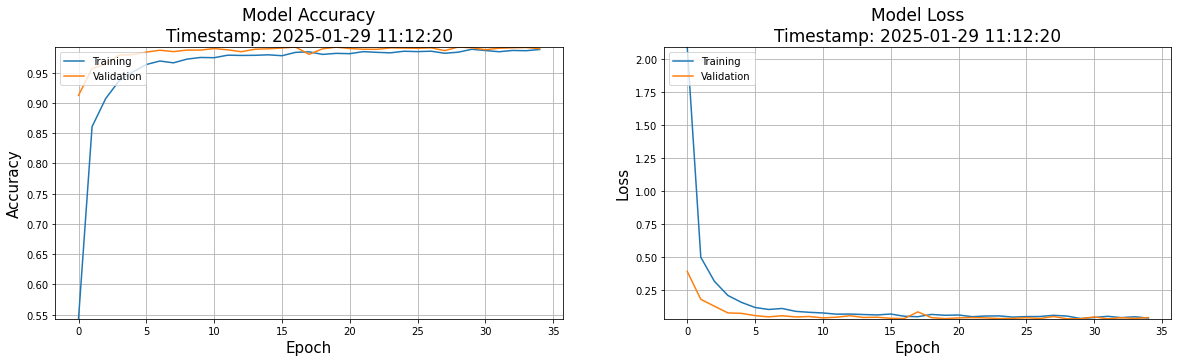

In [12]:
plot_performance(history=history1)

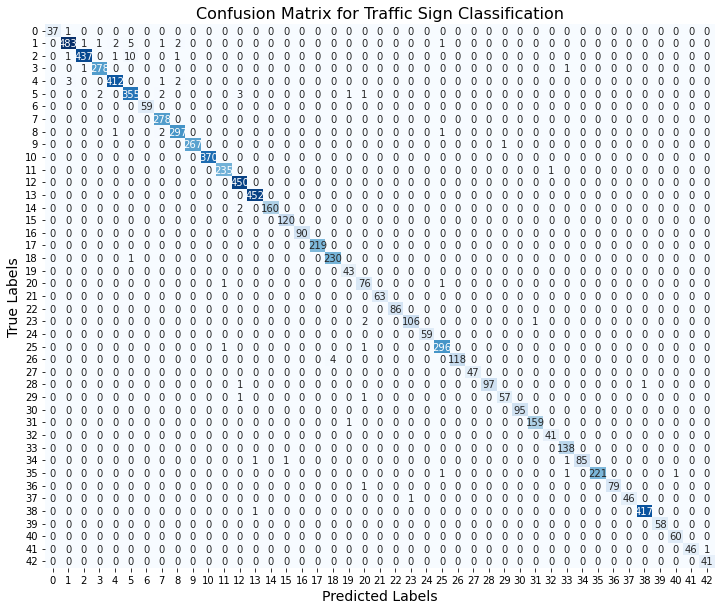

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predicting on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = np.argmax(y_test, axis=1)  # Convert one-hot labels to class indices

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix with Seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=range(43), yticklabels=range(43))

plt.title("Confusion Matrix for Traffic Sign Classification", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# 8. Loading Test Dataset and Evaluating the Model

In [14]:
# testing accuracy on test dataset
from sklearn.metrics import accuracy_score

# Importing the test dataset
y_test = pd.read_csv('../input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

# Retreiving the images
with tf.device('/GPU:0'):
    for img in imgs:
        image = Image.open('../input/gtsrb-german-traffic-sign/'+img)
        image = image.resize([30, 30])
        data.append(np.array(image))

X_test=np.array(data)

In [15]:
with tf.device('/GPU:0'):
    pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

0.9543151227236738


# 9. Saving the Model

In [16]:
# Saving the Model 
model.save('traffic_classifier.h5')

Enter the image file path:  /kaggle/input/gtsrb-german-traffic-sign/Test/00005.png


Predicted Traffic Sign: Keep right


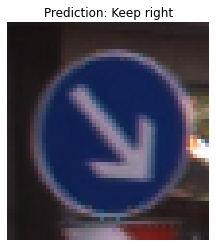

In [19]:
import numpy as np
from PIL import Image
from keras.models import load_model
import matplotlib.pyplot as plt
from tkinter import filedialog  # Works only in Jupyter Notebook

# Load the trained model
model = load_model('traffic_classifier.h5')

# Dictionary of class labels
classes = {1: 'Speed limit (20km/h)', 2: 'Speed limit (30km/h)', 3: 'Speed limit (50km/h)',
           4: 'Speed limit (60km/h)', 5: 'Speed limit (70km/h)', 6: 'Speed limit (80km/h)', 
           7: 'End of speed limit (80km/h)', 8: 'Speed limit (100km/h)', 9: 'Speed limit (120km/h)', 
           10: 'No passing', 11: 'No passing veh over 3.5 tons', 12: 'Right-of-way at intersection',
           13: 'Priority road', 14: 'Yield', 15: 'Stop', 16: 'No vehicles', 17: 'Veh > 3.5 tons prohibited', 
           18: 'No entry', 19: 'General caution', 20: 'Dangerous curve left', 21: 'Dangerous curve right', 
           22: 'Double curve', 23: 'Bumpy road', 24: 'Slippery road', 25: 'Road narrows on the right', 
           26: 'Road work', 27: 'Traffic signals', 28: 'Pedestrians', 29: 'Children crossing', 
           30: 'Bicycles crossing', 31: 'Beware of ice/snow', 32: 'Wild animals crossing', 
           33: 'End speed + passing limits', 34: 'Turn right ahead', 35: 'Turn left ahead', 
           36: 'Ahead only', 37: 'Go straight or right', 38: 'Go straight or left', 39: 'Keep right', 
           40: 'Keep left', 41: 'Roundabout mandatory', 42: 'End of no passing', 
           43: 'End no passing veh > 3.5 tons'}

# Upload an image in Jupyter (only works inside Jupyter Notebook)
try:
    file_path = filedialog.askopenfilename()  # Opens file dialog (not supported in Kaggle directly)
except:
    file_path = input("Enter the image file path: ")  # Alternative for Kaggle

# Load and preprocess the image
image = Image.open(file_path)
image = image.resize((30,30))  # Resize to model input shape
image = np.expand_dims(image, axis=0)  # Add batch dimension
image = np.array(image)

# Make prediction
pred = np.argmax(model.predict(image), axis=-1)[0]
sign = classes.get(pred+1, "Unknown")

# Display results
print(f"Predicted Traffic Sign: {sign}")

# Show the image
plt.imshow(Image.open(file_path))
plt.axis('off')
plt.title(f"Prediction: {sign}")
plt.show()
